# Probability Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Discrete Probability Distributions

### Exercice 1: Simulating a Fair Die Roll

Goal: 
- Understand discrete uniform distributions and empirical probability.

Task: 
- Simulate rolling a fair six-sided die 10,000 times and 
- Estimate the probability of each face. 
- Plot the distribution.

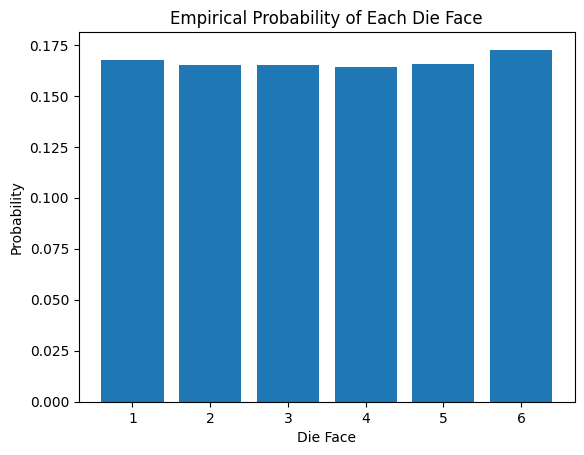

In [2]:
import numpy as np

# Simulate 10,000 rolls of a fair die
rolls = np.random.randint(1, 7, size=10000)

# Count occurrences of each outcome
values, counts = np.unique(rolls, return_counts=True)
probs = counts / len(rolls)

# Plot empirical probabilities
plt.bar(values, probs)
plt.title("Empirical Probability of Each Die Face")
plt.xlabel("Die Face")
plt.ylabel("Probability")
plt.show()

### Exercice 2: Sum of two dice

Goal: 
- Understand the convolution of discrete distributions.

Task: 
- Simulate rolling two fair dice and 
- plot the distribution of the sum of their faces.

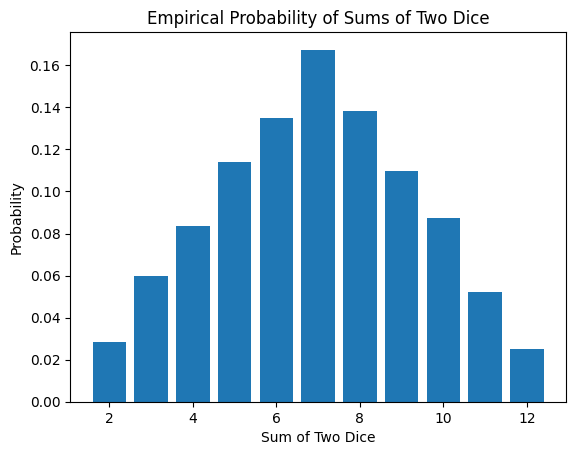

In [3]:
import numpy as np
import matplotlib.pyplot as plt

dice1 = np.random.randint(1, 7, size=10000)
dice2 = np.random.randint(1, 7, size=10000)
sums = dice1 + dice2

# Count occurrences of each outcome
values, counts = np.unique(sums, return_counts=True)
probs = counts / len(sums)
# Plot empirical probabilities
plt.bar(values, probs)
plt.title("Empirical Probability of Sums of Two Dice")
plt.xlabel("Sum of Two Dice")
plt.ylabel("Probability")
plt.show()

### Exercice 3: Binomial Distribution: coin toss

Goal: 
- Apply the binomial distribution to a real-world experiment.

Task: 
- Simulate tossing a fair coin 100 times. 
- What is the probability of getting exactly 55 heads? 
- What is the probability of getting at least 60 heads?

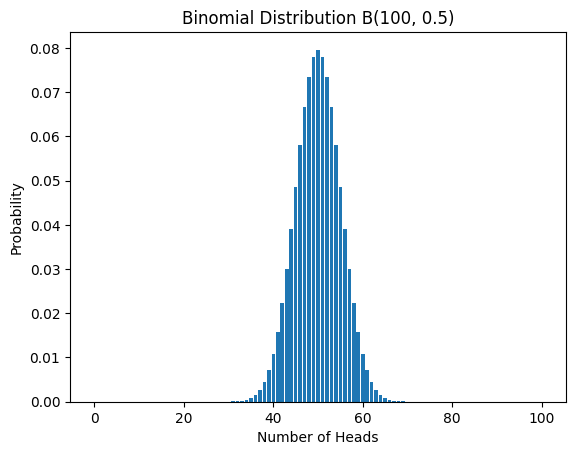

P(exactly 55 heads) = 0.0485
P(at least 60 heads) = 0.0284


In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# Parameters: 
# number of trials and success probability
n, p = 100, 0.5
# x the array representing the number of possible successes (0 to n)
x = np.arange(0, n+1)

# Compute binomial probabilities mass function
pmf = binom.pmf(x, n, p)
# pmf[i] corresponds to P(X = i) for i in x

# Plot the distribution
plt.bar(x, pmf)
plt.title("Binomial Distribution B(100, 0.5)")
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.show()

# Compute exact and cumulative probabilities
p_55 = binom.pmf(55, n, p)
p_at_least_60 = 1 - binom.cdf(59, n, p)

print(f"P(exactly 55 heads) = {p_55:.4f}")
print(f"P(at least 60 heads) = {p_at_least_60:.4f}")

### **Exercise 4** — Normal Distribution and the 68-95-99 Rule  

Goal: Understand continuous distributions and the empirical rule.  

Task: Generate values from a standard normal distribution and check how many fall within 1 standard deviation of the mean.

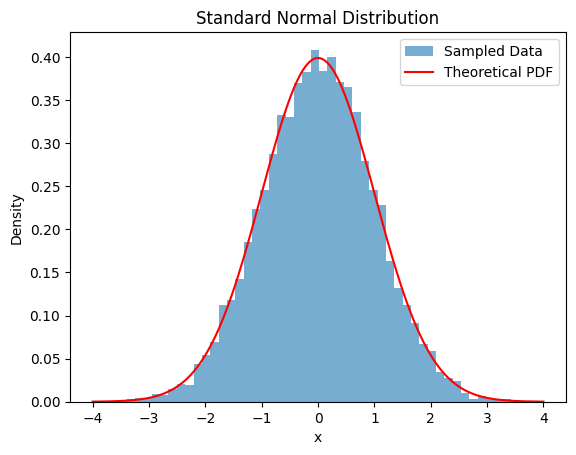

Proportion within ±1 standard deviation: 68.44%


In [5]:
from scipy.stats import norm

# Generate random data from N(0, 1)
data = np.random.normal(0, 1, size=10000)

# Plot histogram with normal curve
plt.hist(data, bins=50, density=True, alpha=0.6, label='Sampled Data')

x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x), 'r', label='Theoretical PDF')
plt.title("Standard Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# Calculate proportion within 1 standard deviation
within_1std = np.mean((data > -1) & (data < 1))
print(f"Proportion within ±1 standard deviation: {within_1std:.2%}")


### **Exercise 5** — Bayes’ Theorem in Medical Testing

Goal: Apply Bayes' theorem in a practical context.

Task: A medical test has 95% sensitivity, 90% specificity, and the disease prevalence is 1%. Calculate the probability of having the disease given a positive test result.

In [6]:
# Define given values
P_disease = 0.01
P_no_disease = 0.99
P_pos_given_disease = 0.95
P_pos_given_no_disease = 0.10  # 1 - specificity

# Apply Bayes' theorem
numerator = P_pos_given_disease * P_disease
denominator = numerator + P_pos_given_no_disease * P_no_disease
P_disease_given_positive = numerator / denominator

print(f"Probability of having the disease given a positive test: {P_disease_given_positive:.2%}")


Probability of having the disease given a positive test: 8.76%


### **Exercise 6** — Markov Chain Simulation

Goal: Understand simple stochastic processes with transition probabilities.

Task: A customer switches coffee brands weekly. Simulate their brand preference over 100 weeks using a Markov chain.

In [7]:
# Define states and transition probabilities
states = ['A', 'B']
transition = {
    'A': {'A': 0.7, 'B': 0.3},
    'B': {'A': 0.4, 'B': 0.6}
}

np.random.seed(42)
current = 'A'
history = [current]

# Simulate state transitions over 100 steps
for _ in range(99):
    current = np.random.choice(states, p=[
        transition[current]['A'],
        transition[current]['B']
    ])
    history.append(current)

# Count how often each state occurred
from collections import Counter
counts = Counter(history)
print(f"State frequencies over 100 steps: {counts}")


State frequencies over 100 steps: Counter({'A': 60, np.str_('B'): 40})


### Exercise 7 - Chi-squared test: is the die fair?

Goal: 
- Use hypothesis testing to detect bias.

Task: 
- You suspect a die is unfair. Given the outcomes of 600 rolls, use the chi-square test to verify the fairness assumption.

In [ ]:
# Null hypothesis (H0): The die is fair — each face has equal probability (1/6).
# Alternative hypothesis (H1): The die is not fair — some faces occur more frequently than others.

from scipy.stats import chisquare

# Observed frequencies of each face after 600 rolls
# face 1 appears 90 times, face 2 appears 100 times, etc.
observed = np.array([90, 100, 110, 100, 105, 95])
expected = np.array([100] * 6)  # expected if die is fair

# Perform chi-square test
# chi2_stat: the chi-squared statistic, measuring the total deviation
# p_value: the probability of seeing this deviation by chance if the die is truly fair
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"p-value: {p_value:.4f}")


Chi-squared statistic: 2.50
p-value: 0.7765


✅ Interpretation  
The chi-squared statistic (2.50) is quite low. This means the differences between observed and expected frequencies are small.  
The p-value (0.7765) is much higher than a typical significance threshold like 0.05 or 0.01.

📌 Conclusion  
Since p-value = 0.7765 > 0.05, we fail to reject the null hypothesis.

Conclusion: There is no significant evidence that the die is unfair.  
The observed results are consistent with what we would expect from a fair die.